1. Walking speed analysis:
   - Scatter plot of age vs walking speed with regression line
   - Box plots by education level
   - Line plot showing education age interaction

2. Cost analysis:
   - Bar plot of mean costs by insurance type
   - Box plots showing cost distributions
   - Add error bars or confidence intervals

3. Combined visualizations:
   - Pair plot of key variables
   - Faceted plots by education/insurance
   - Time trends where relevant 

In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import matplotlib.pyplot as plt 
import seaborn as sns
df = pd.read_csv('ms_data_export.csv') 

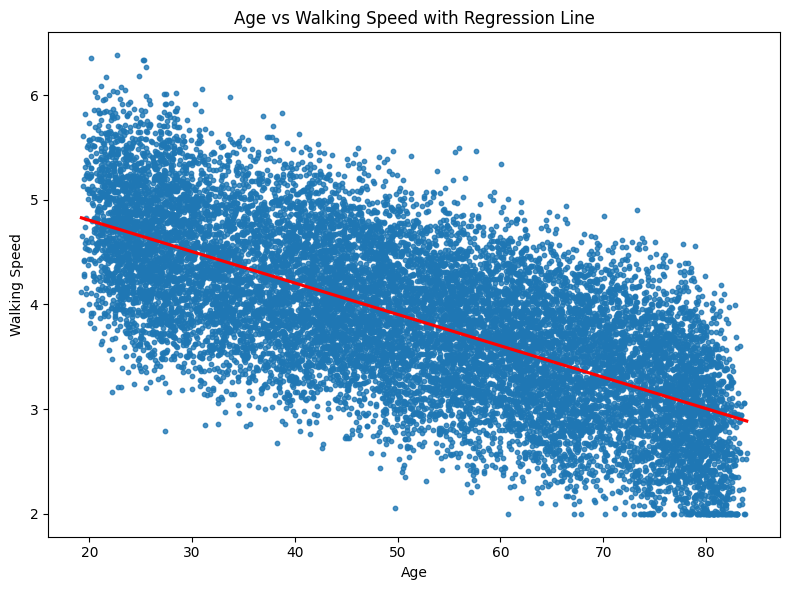

In [4]:
# Scatter plot of age vs walking speed with regression line
plt.figure(figsize=(8, 6))
sns.regplot(x='age', y='walking_speed', data=df, scatter_kws={'s':10}, line_kws={'color':'red'})
plt.title("Age vs Walking Speed with Regression Line")
plt.xlabel("Age")
plt.ylabel("Walking Speed")
plt.tight_layout()
plt.show()

/var/folders/jw/cf00zth95z952r8rhf0k093h0000gn/T/ipykernel_8385/3469101888.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='education_level', y='walking_speed', data=df, palette="Set2")


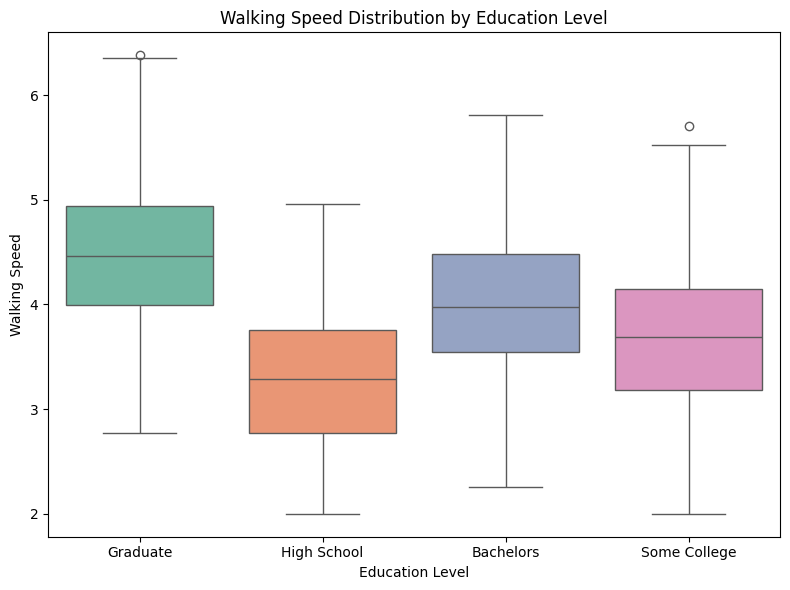

In [5]:
# Box plots by education level
plt.figure(figsize=(8, 6))
sns.boxplot(x='education_level', y='walking_speed', data=df, palette="Set2")
plt.title("Walking Speed Distribution by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Walking Speed")
plt.tight_layout()
plt.show() 

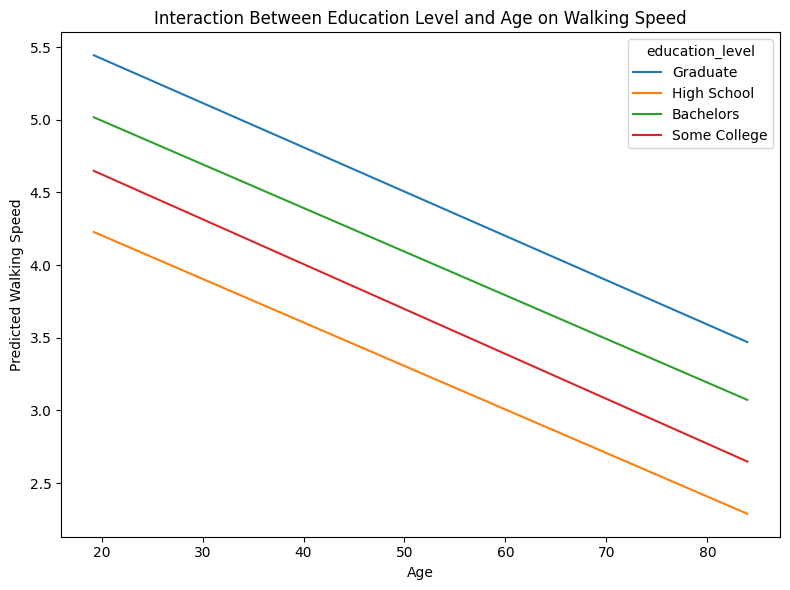

In [6]:
#Line plot showing education age interaction
model = smf.ols("walking_speed ~ age * C(education_level)", data=df).fit()

age_range = pd.Series(np.linspace(df['age'].min(), df['age'].max(), 100), name='age')
education_levels = df['education_level'].unique()

prediction_df = pd.DataFrame({'age': np.tile(age_range, len(education_levels)),
                              'education_level': np.repeat(education_levels, len(age_range))}) 

prediction_df['predicted_walking_speed'] = model.predict(prediction_df)

plt.figure(figsize=(8, 6))
sns.lineplot(x='age', y='predicted_walking_speed', hue='education_level', data=prediction_df)
plt.title("Interaction Between Education Level and Age on Walking Speed")
plt.xlabel("Age")
plt.ylabel("Predicted Walking Speed")
plt.tight_layout()
plt.show()

/var/folders/jw/cf00zth95z952r8rhf0k093h0000gn/T/ipykernel_8385/222939719.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
/var/folders/jw/cf00zth95z952r8rhf0k093h0000gn/T/ipykernel_8385/222939719.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/jw/cf00zth95z952r8rhf0k093h0000gn/T/ipykernel_8385/222939719.py:17: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  sns.barplot(
/var/folders/jw/cf00zth95z952r8rhf0k093h0000gn/T/ipykernel_8385/222939719.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="insurance_type", y="visi

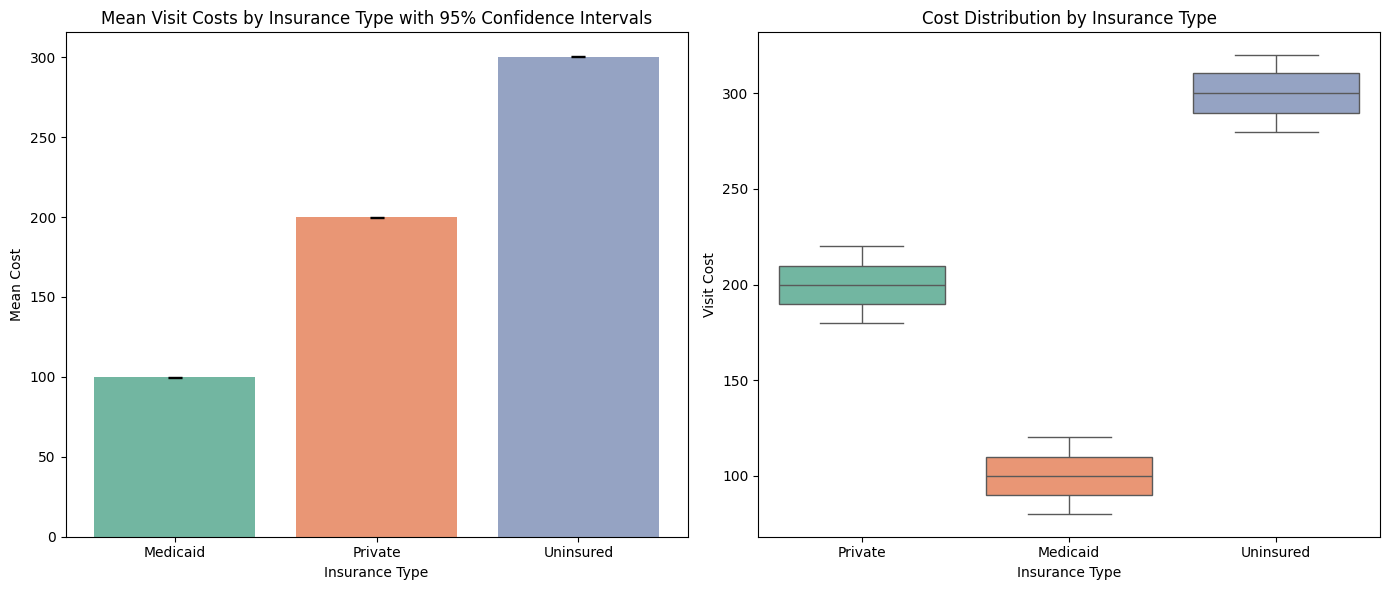

In [ ]:
# 2.
# Calculate mean, standard deviation, and counts
mean_costs = df.groupby('insurance_type')['visit_cost'].mean()
std_costs = df.groupby('insurance_type')['visit_cost'].std()
n = df.groupby('insurance_type')['visit_cost'].count()

# Calculate confidence intervals
ci = 1.96 * (std_costs / n**0.5)

# Prepare the DataFrame for plotting
mean_costs_df = mean_costs.reset_index()
mean_costs_df["ci"] = ci.values

plt.figure(figsize=(14, 6))

# Plot 1: Bar plot of mean costs by insurance type with confidence intervals
plt.subplot(1, 2, 1)
sns.barplot(
    data=mean_costs_df,
    x="insurance_type",
    y="visit_cost",
    palette="Set2",
    capsize=0.1,
    errwidth=1,
    ci=None  
)

# Add error bars manually using the CI
for i, (mean, err) in enumerate(zip(mean_costs_df["visit_cost"], mean_costs_df["ci"])):
    plt.errorbar(
        x=i,
        y=mean,
        yerr=err,
        fmt='none',
        c='black',
        capsize=5
    )

plt.title("Mean Visit Costs by Insurance Type with 95% Confidence Intervals")
plt.xlabel("Insurance Type")
plt.ylabel("Mean Cost")

# Plot 2: Box plot of cost distributions by insurance type
plt.subplot(1, 2, 2)
sns.boxplot(x="insurance_type", y="visit_cost", data=df, palette="Set2")
plt.title("Cost Distribution by Insurance Type")
plt.xlabel("Insurance Type")
plt.ylabel("Visit Cost")

plt.tight_layout()
plt.show()


/var/folders/jw/cf00zth95z952r8rhf0k093h0000gn/T/ipykernel_8385/482788030.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper left')


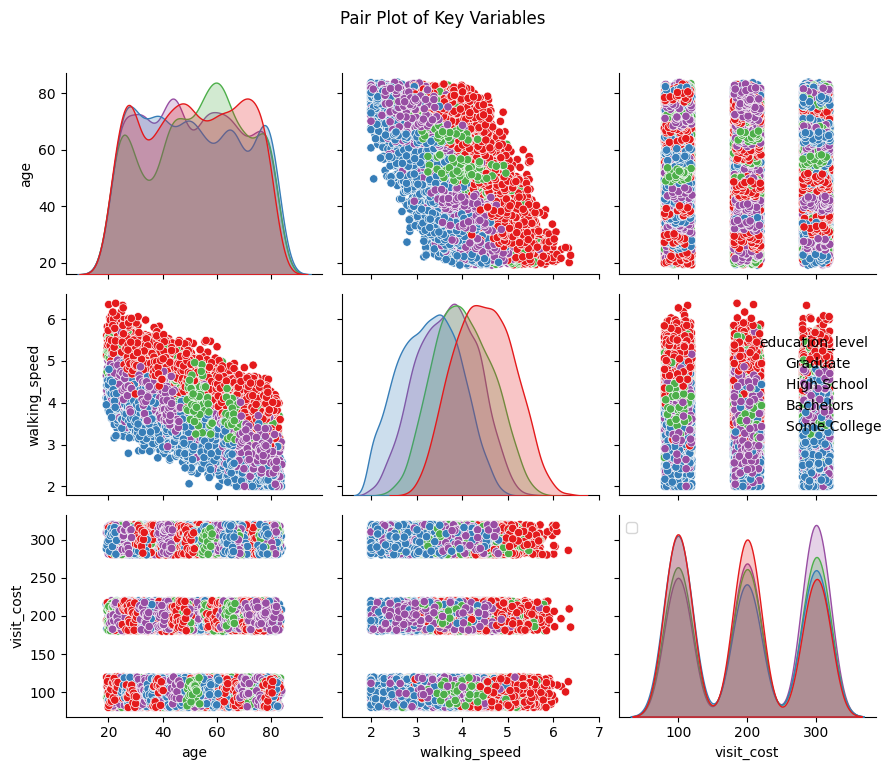

In [20]:
# Pair plot of key variables
sns.pairplot(df, vars=["age", "walking_speed", "visit_cost"], hue="education_level", palette="Set1")
plt.suptitle("Pair Plot of Key Variables", y=1.02)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

/Users/avantikasharma/09-second-exam-AvantikaSharma3357/Exam2/lib/python3.12/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/avantikasharma/09-second-exam-AvantikaSharma3357/Exam2/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/avantikasharma/09-second-exam-AvantikaSharma3357/Exam2/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/avantikasharma/09-second-exam-AvantikaSharma3357/Exam2/lib/python3.12/site-pack

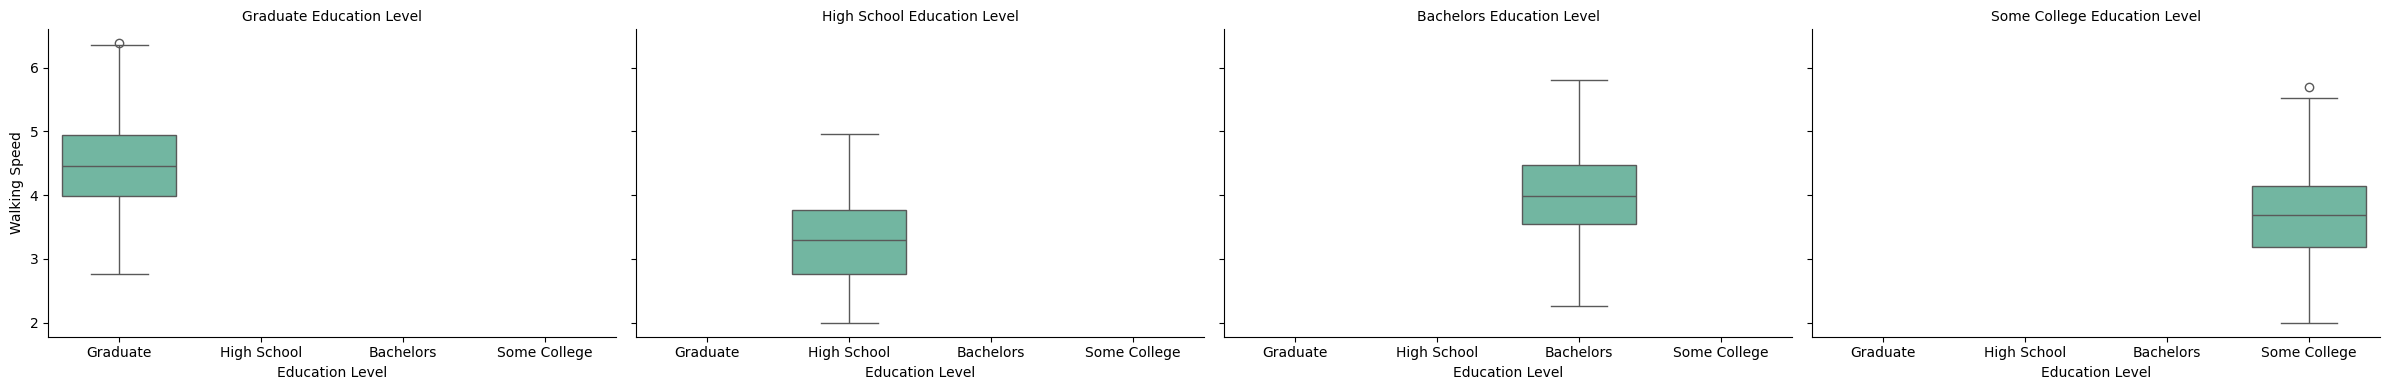

/Users/avantikasharma/09-second-exam-AvantikaSharma3357/Exam2/lib/python3.12/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/avantikasharma/09-second-exam-AvantikaSharma3357/Exam2/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/avantikasharma/09-second-exam-AvantikaSharma3357/Exam2/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/avantikasharma/09-second-exam-AvantikaSharma3357/Exam2/lib/python3.12/site-pack

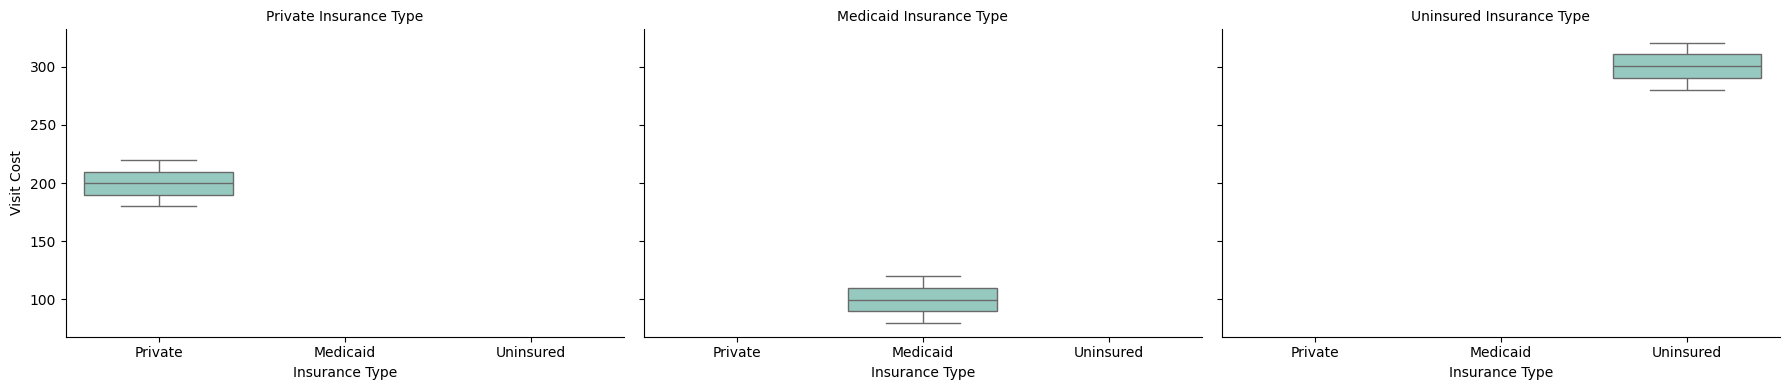

In [11]:
# Faceted plots by education/insurance

# Facet grid of walking speed by education level
g = sns.FacetGrid(df, col="education_level", height=4, aspect=1.5)
g.map(sns.boxplot, "education_level", "walking_speed", palette="Set2")
g.set_titles("{col_name} Education Level")
g.set_axis_labels("Education Level", "Walking Speed")
plt.tight_layout()
plt.show()

# Facet grid of visit cost by insurance type
g = sns.FacetGrid(df, col="insurance_type", height=4, aspect=1.5)
g.map(sns.boxplot, "insurance_type", "visit_cost", palette="Set3")
g.set_titles("{col_name} Insurance Type")
g.set_axis_labels("Insurance Type", "Visit Cost")
plt.tight_layout()
plt.show()

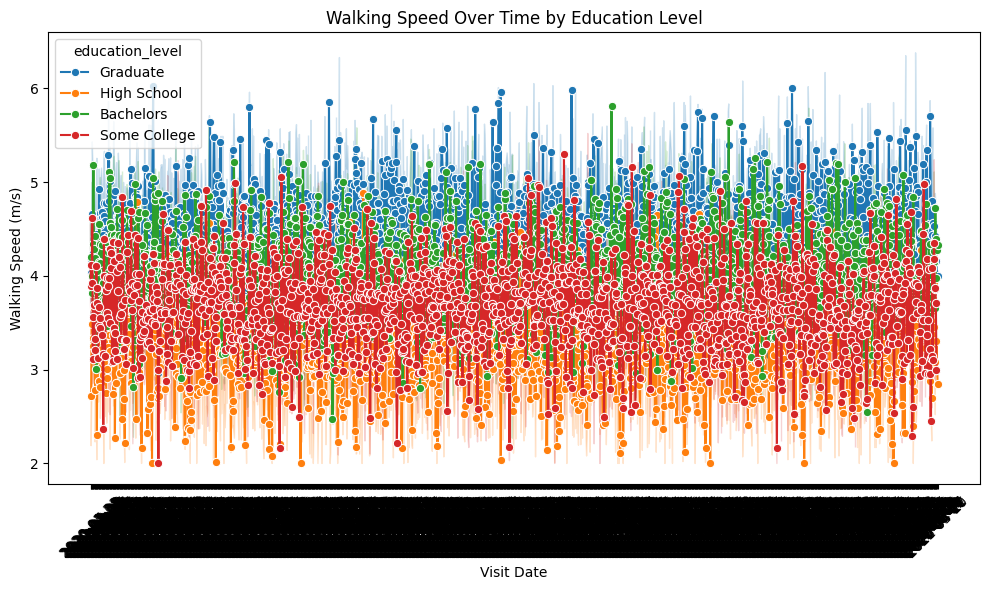

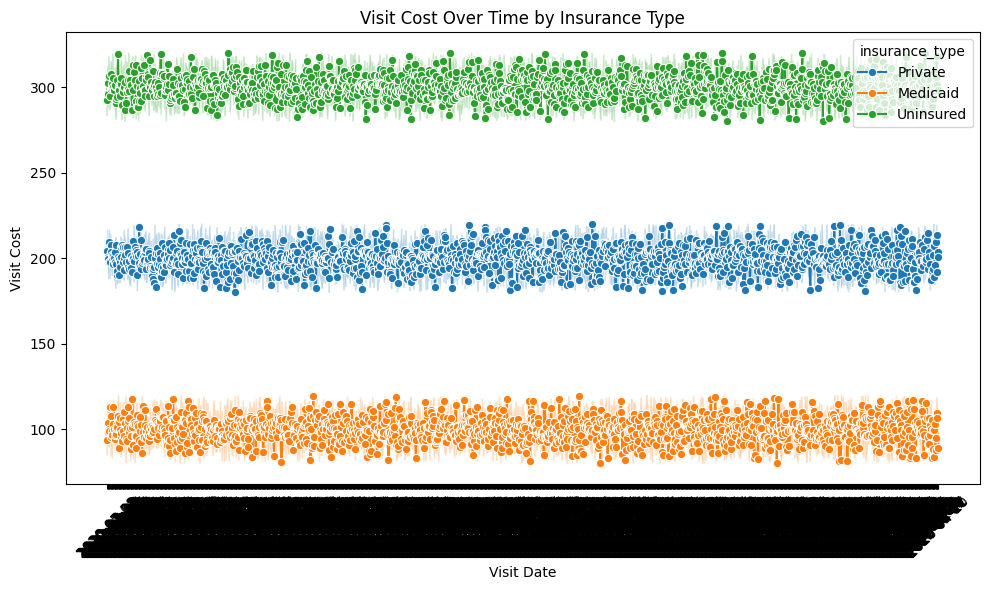

In [13]:
# Time trends where relevant 
# Create a line plot for walking speed over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x="visit_date", y="walking_speed", hue="education_level", marker="o")
plt.title("Walking Speed Over Time by Education Level")
plt.xlabel("Visit Date")
plt.ylabel("Walking Speed (m/s)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Create a line plot for visit cost over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x="visit_date", y="visit_cost", hue="insurance_type", marker="o")
plt.title("Visit Cost Over Time by Insurance Type")
plt.xlabel("Visit Date")
plt.ylabel("Visit Cost")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show() 